# Imports

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

import shap

from sklearn import ensemble
from sklearn import neighbors

# Data

In [2]:
df = pd.read_csv('data/winequality-red.csv')  # Load the data
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# The target variable is 'quality'.
Y = df['quality']
X = df.drop(columns=['quality'])
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# RandomForestRegressor

[0.02771784 0.14608857 0.0098873  0.03979135 0.03834853 0.02349039
 0.07114265 0.01940386 0.04327445 0.20548462 0.37537044]


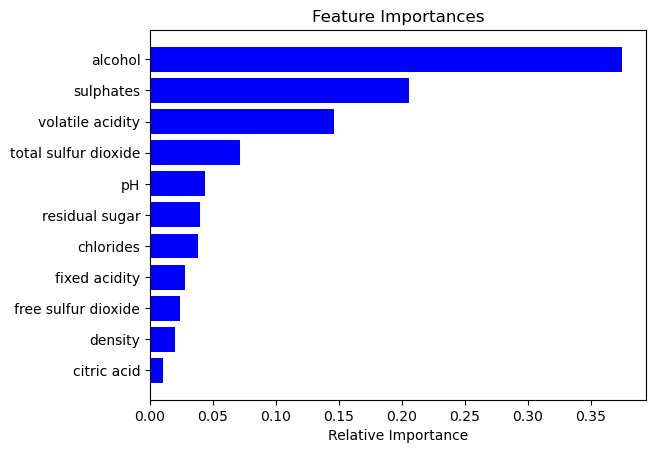

In [4]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 1. Summary Plot

In [5]:
rf_explainer = shap.TreeExplainer(rf, X_train)

In [6]:
rf_shap_values = rf_explainer(X_test)

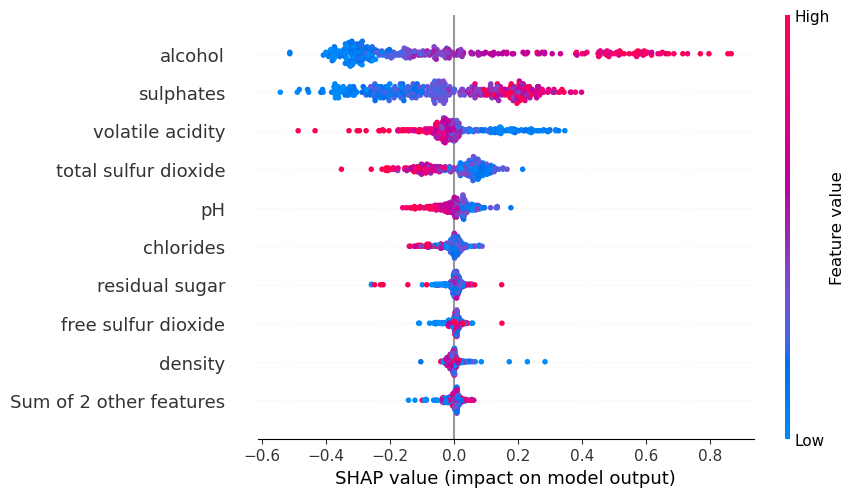

In [7]:
shap.plots.beeswarm(rf_shap_values)

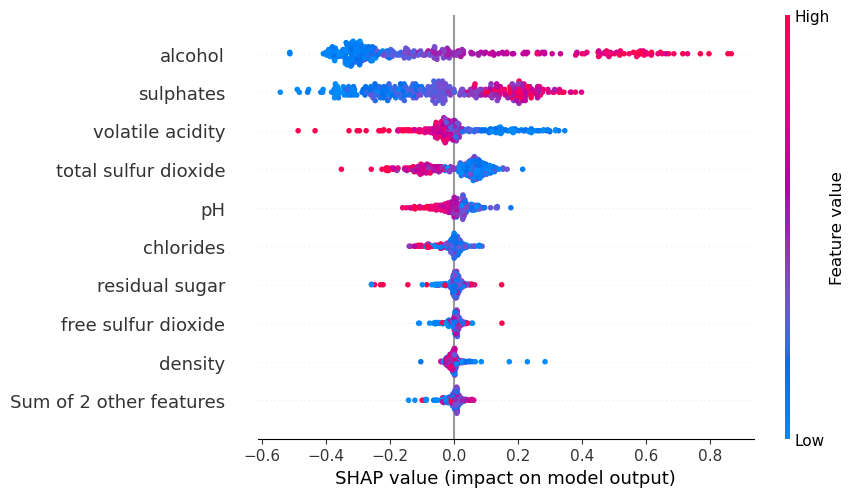

In [8]:
# To save the picture file

f = plt.figure()
shap.plots.beeswarm(rf_shap_values)
f.savefig("pics/summary_plot1.png", bbox_inches='tight', dpi=600)

### 2. Dependence Plot

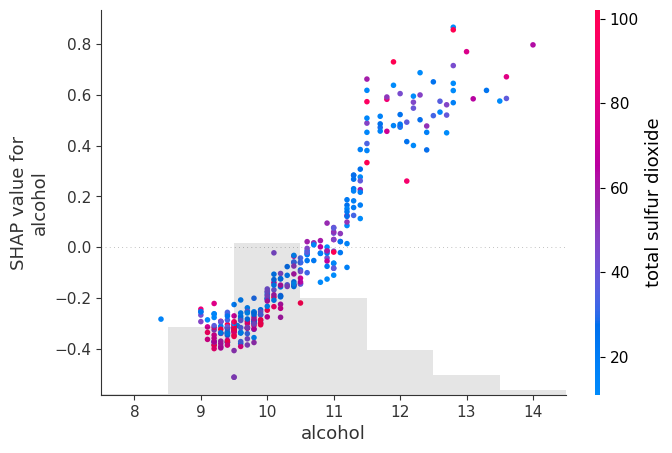

In [9]:
shap.plots.scatter(rf_shap_values[:, "alcohol"], color=rf_shap_values)

### 3. Individual Force Plot

In [10]:
X_test.mean()

fixed acidity            8.248750
volatile acidity         0.519109
citric acid              0.266156
residual sugar           2.481406
chlorides                0.089234
free sulfur dioxide     15.243750
total sulfur dioxide    43.884375
density                  0.996704
pH                       3.316250
sulphates                0.654438
alcohol                 10.458906
dtype: float64

In [11]:
X_test.iloc[10, :]

fixed acidity            8.60000
volatile acidity         0.52000
citric acid              0.38000
residual sugar           1.50000
chlorides                0.09600
free sulfur dioxide      5.00000
total sulfur dioxide    18.00000
density                  0.99666
pH                       3.20000
sulphates                0.52000
alcohol                  9.40000
Name: 1099, dtype: float64

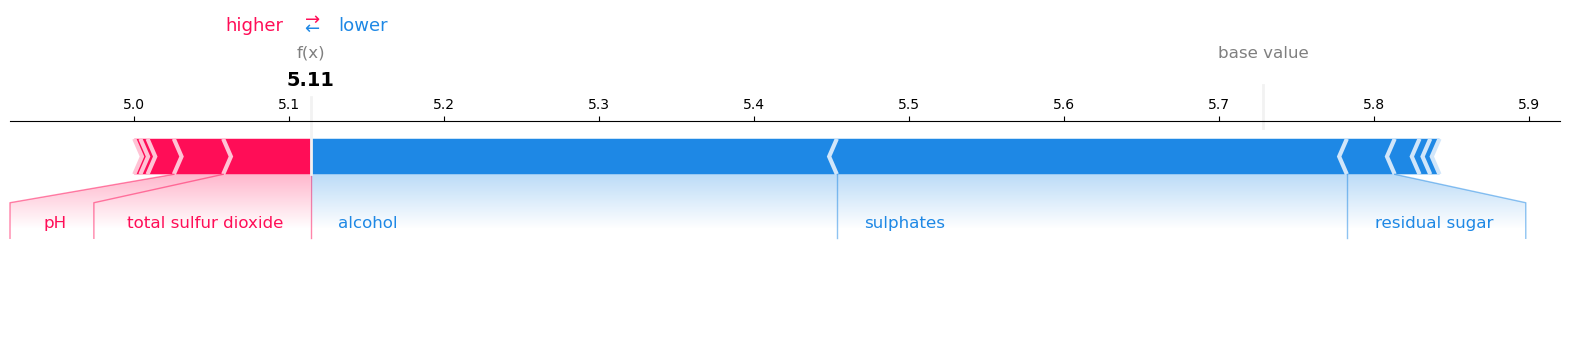

In [12]:
# plot the SHAP values for the 10th observation 
shap.plots.force(
    rf_explainer.expected_value, 
    rf_shap_values[10,:].values, 
    matplotlib=True,   # Without this, it give javascript error
    feature_names=features
)

### 4. Collective Force Plot

In [13]:
shap.initjs()  # Without this, it give javascript error

shap.plots.force(
    rf_explainer.expected_value, 
    rf_shap_values.values,
    feature_names=features
)

# Gradient Boost

In [14]:
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
    n_estimators=n_estimators,
    validation_fraction=0.2,
    n_iter_no_change=5, 
    tol=0.01,
    random_state=0)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=500, n_iter_no_change=5, random_state=0,
                           tol=0.01, validation_fraction=0.2)

### 1. Summary Plot

In [15]:
gbm_explainer = shap.Explainer(gbm.predict, X_train)

In [16]:
gbm_shap_values = gbm_explainer(X_test)

Permutation explainer: 321it [00:39,  6.55it/s]                                                                        


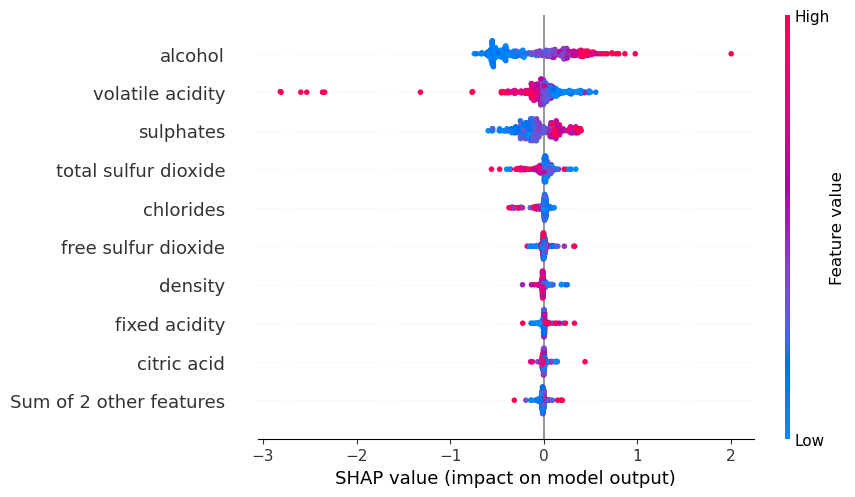

In [17]:
shap.plots.beeswarm(gbm_shap_values)

### 2. Dependence Plot

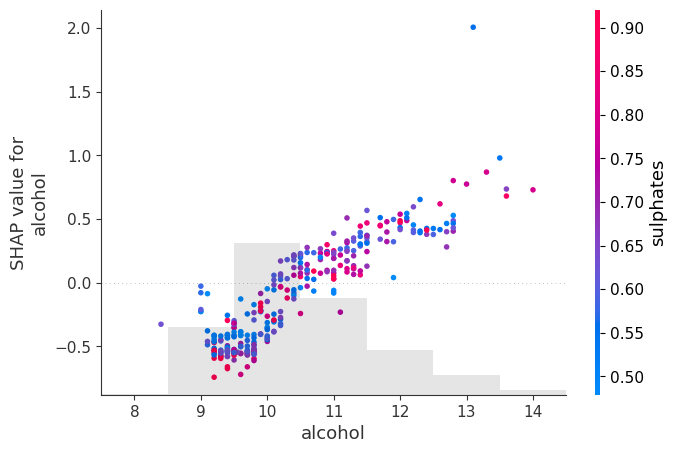

In [18]:
shap.plots.scatter(gbm_shap_values[:, "alcohol"], color=gbm_shap_values)

### 3. Individual Force Plot

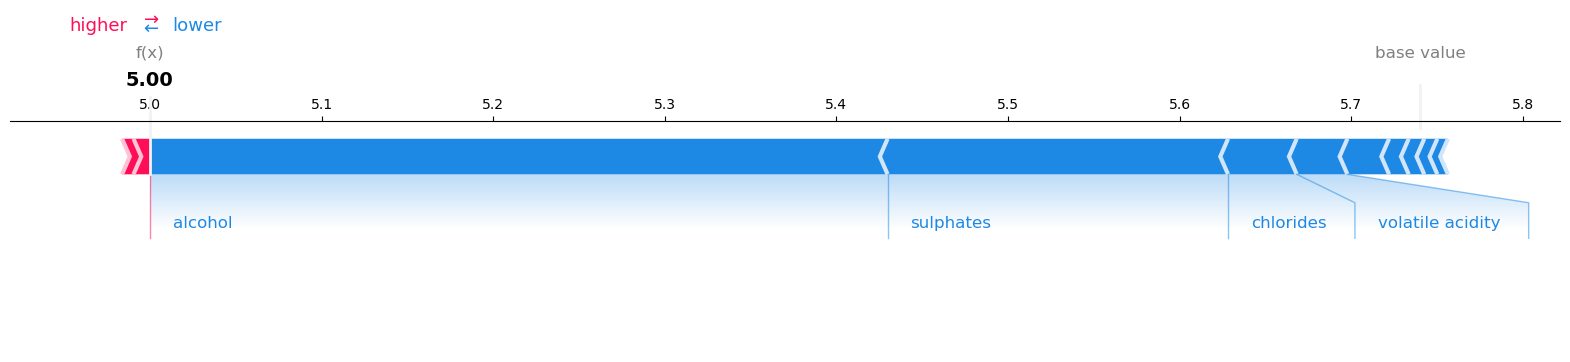

In [19]:
# plot the SHAP values for the 10th observation 
shap.plots.force(
    gbm_shap_values.base_values,   # .expected_value doesn't exist for gbm_explainer
    gbm_shap_values[10, :].values, 
    matplotlib=True,   # Without this, it give javascript error
    feature_names=features
)

### 4. Collective Force Plot

In [20]:
shap.plots.force(
    gbm_shap_values, 
    gbm_shap_values.values,
    feature_names=features
)

# KNN

In [21]:
# Train the KNN model
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

### 1. Summary Plot

In [22]:
knn_explainer = shap.Explainer(knn.predict, X_train)

In [23]:
knn_shap_values = knn_explainer(X_test)

Permutation explainer: 321it [01:52,  2.61it/s]                                                                        


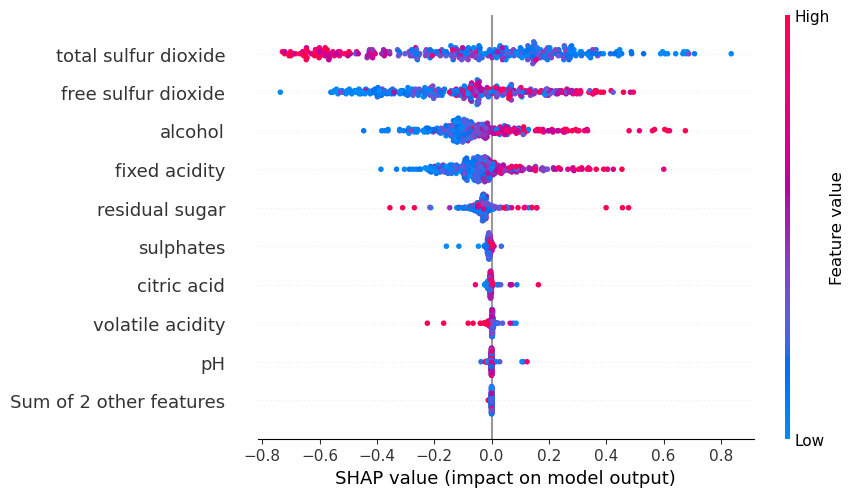

In [24]:
shap.plots.beeswarm(knn_shap_values)

### 2. Dependence Plot

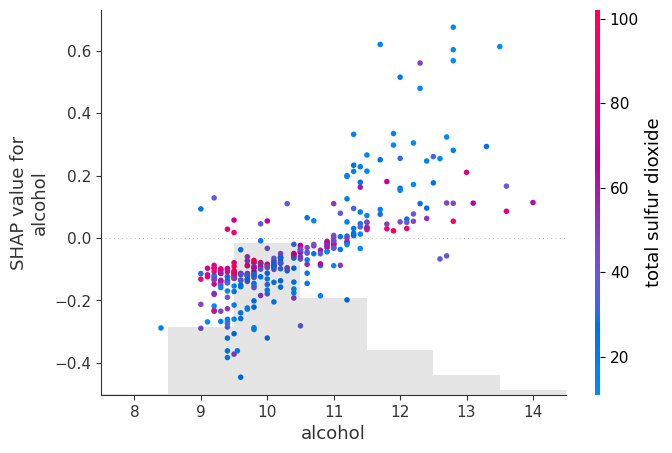

In [25]:
shap.plots.scatter(knn_shap_values[:, "alcohol"], color=knn_shap_values)

### 3. Individual Force Plot

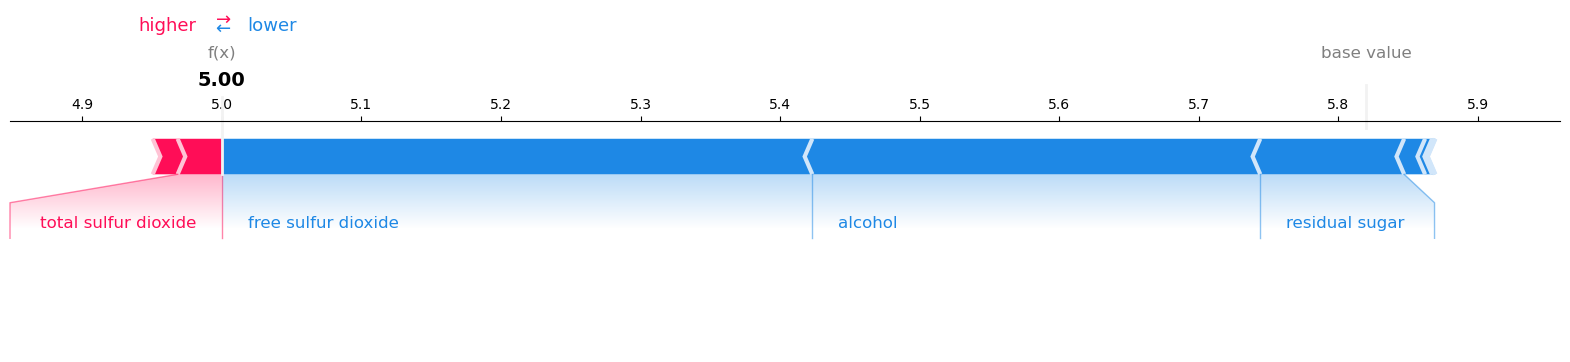

In [26]:
# plot the SHAP values for the 10th observation 
shap.plots.force(
    knn_shap_values.base_values, 
    knn_shap_values[10,:].values, 
    matplotlib=True,   # Without this, it give javascript error
    feature_names=features
)

### 4. Collective Force Plot

In [27]:
shap.plots.force(
    knn_shap_values,
    knn_shap_values.values,
    feature_names=features
)